## About dataset
This dataset contains various features of a car, such as, horsepower, brand name, mileage, etc. And we have to predict price of the car based on these features.

Dataset: https://github.com/richarm21/OIBSIP/blob/main/CarPrice_Assignment.csv

## Problem statement
Prediction of price of a car (regression)

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

I will store copy original data for data visualization purpose where I will need categorical values.

In [2]:
# Read data
data = pd.read_csv('CarPrice_Assignment.csv')
# Storing original data in different variable
df = data.copy()
# View data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Columns description:

|Features|Description|Features|Description|
|:--------|:--------|:--------|:--------|
|car_ID|Unique id of each observation (Interger)|curbweight|The weight of a car without occupants or baggage (Numeric)|
|symboling|Its assigned insurance risk rating. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe (Categorical)|enginetype|Type of engine. (Categorical)|
|CarName|Name of car company (Categorical)|cylindernumber|cylinder placed in the car (Categorical)|
|fueltype|Car fuel type i.e gas or diesel (Categorical)|enginesize|Size of car (Numeric)|		
|aspiration|Aspiration used in a car (Categorical)|fuelsystem|Fuel system of car (Categorical)|
|doornumber|Number of doors in a car (Categorical)|boreratio|Boreratio of car (Numeric)|		
|carbody|body of car (Categorical)|stroke|Stroke or volume inside the engine (Numeric)|
|drivewheel|type of drive wheel (Categorical)|compressionratio|compression ratio of car (Numeric)|		
|enginelocation|Location of car engine (Categorical)|horsepower|Horsepower (Numeric)|		
|wheelbase|Weelbase of car (Numeric)|peakrpm|car peak rpm (Numeric)|
|carlength|Length of car (Numeric)|citympg|Mileage in city (Numeric)|		
|carwidth|Width of car (Numeric)|highwaympg|Mileage on highway (Numeric)|		
|carheight|height of car (Numeric)|price|Price of car (Numeric)|						

## Explore data

In [3]:
df.shape 

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Check for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

## Observation
* There are 205 rows and 26 columns.
* There are no null values and no duplicates in the dataset.
* There are 10 categorical columns.

## Data preprocessing

* ### Removing unnecessary columns
As 'car_ID' is not statistically important, I am dropping it.

In [7]:
df.drop('car_ID', axis = 1, inplace= True)

* ### Changing categorical columns into numerical

In [8]:
# View categorical columns
cat = df.columns[df.dtypes=='object']
cat

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [9]:
# Check frequency of values
for col in cat:
    print(df[col].value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi  

I will convert columns 'doornumber' and 'cylindernumber' by replacing numbers in words by numbers. And, for rest of the columns, I will use ordinal encoder.

In [10]:
df['doornumber'] = df['doornumber'].replace({'four':4,'two':2})
df['cylindernumber'] = df['cylindernumber'].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cat_col=['CarName', 'fueltype', 'aspiration', 'carbody','drivewheel', 'enginelocation', 'enginetype','fuelsystem']
df[cat_col]=enc.fit_transform(df[cat_col])

In [12]:
# Review preprocessed data
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2.0,1.0,0.0,2,0.0,2.0,0.0,88.6,168.8,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3.0,1.0,0.0,2,0.0,2.0,0.0,88.6,168.8,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1.0,1.0,0.0,2,2.0,2.0,0.0,94.5,171.2,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4.0,1.0,0.0,4,3.0,1.0,0.0,99.8,176.6,...,109,5.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5.0,1.0,0.0,4,3.0,0.0,0.0,99.4,176.6,...,136,5.0,3.19,3.40,8.0,115,5500,18,22,17450.0


As the data has been preprocessed, we can use it for model building. But before that let's explore it more through data visualization.

## Data Visualization

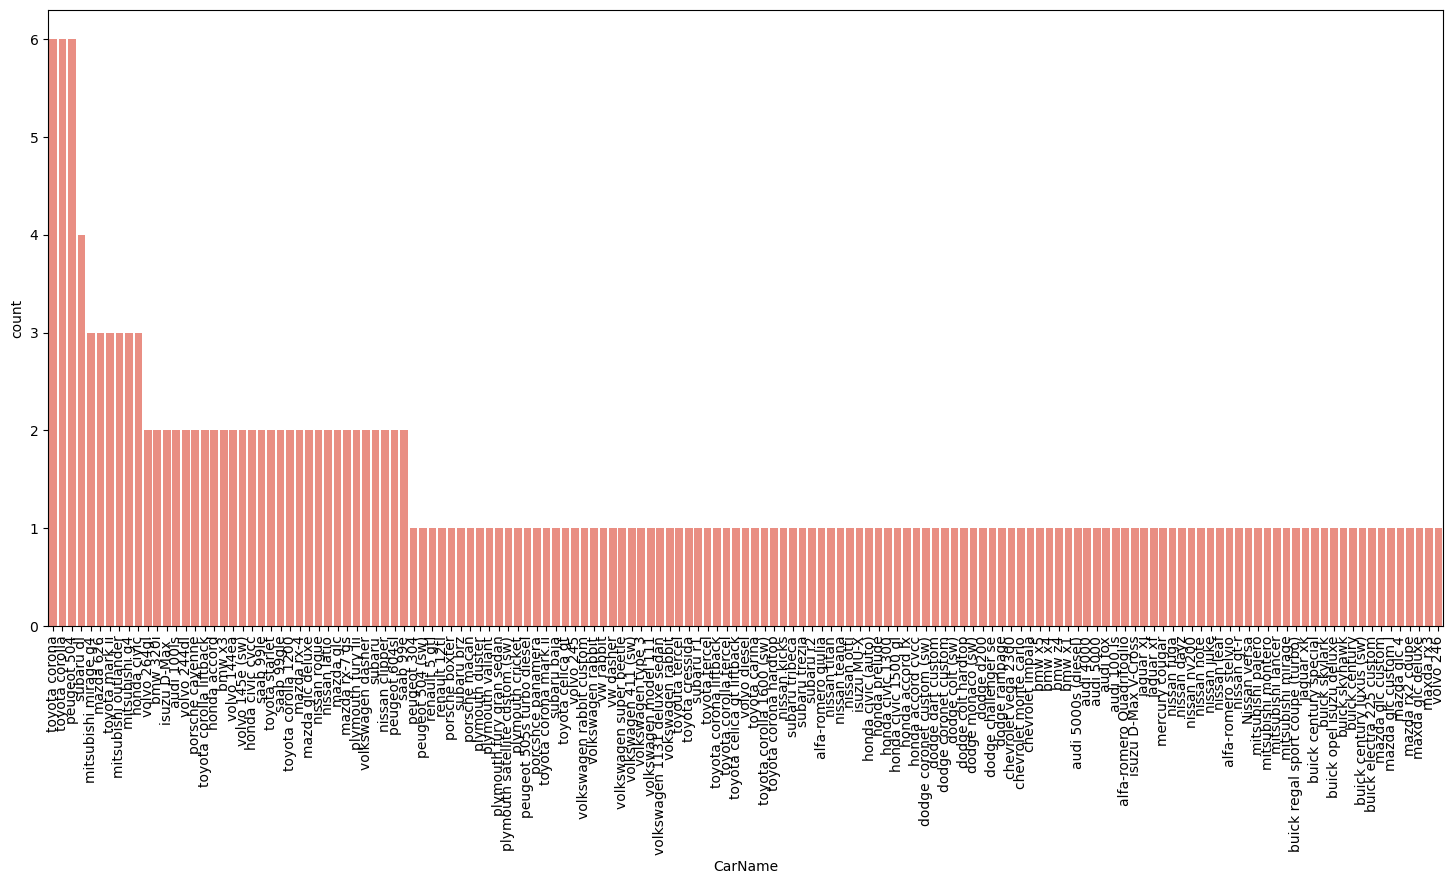

In [13]:
plt.figure(figsize=(18,8))
sns.countplot(data['CarName'], color='salmon', order=data['CarName'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Cars 'toyota corona', 'peugeot', 'toyota corolla' appeared maximum times.

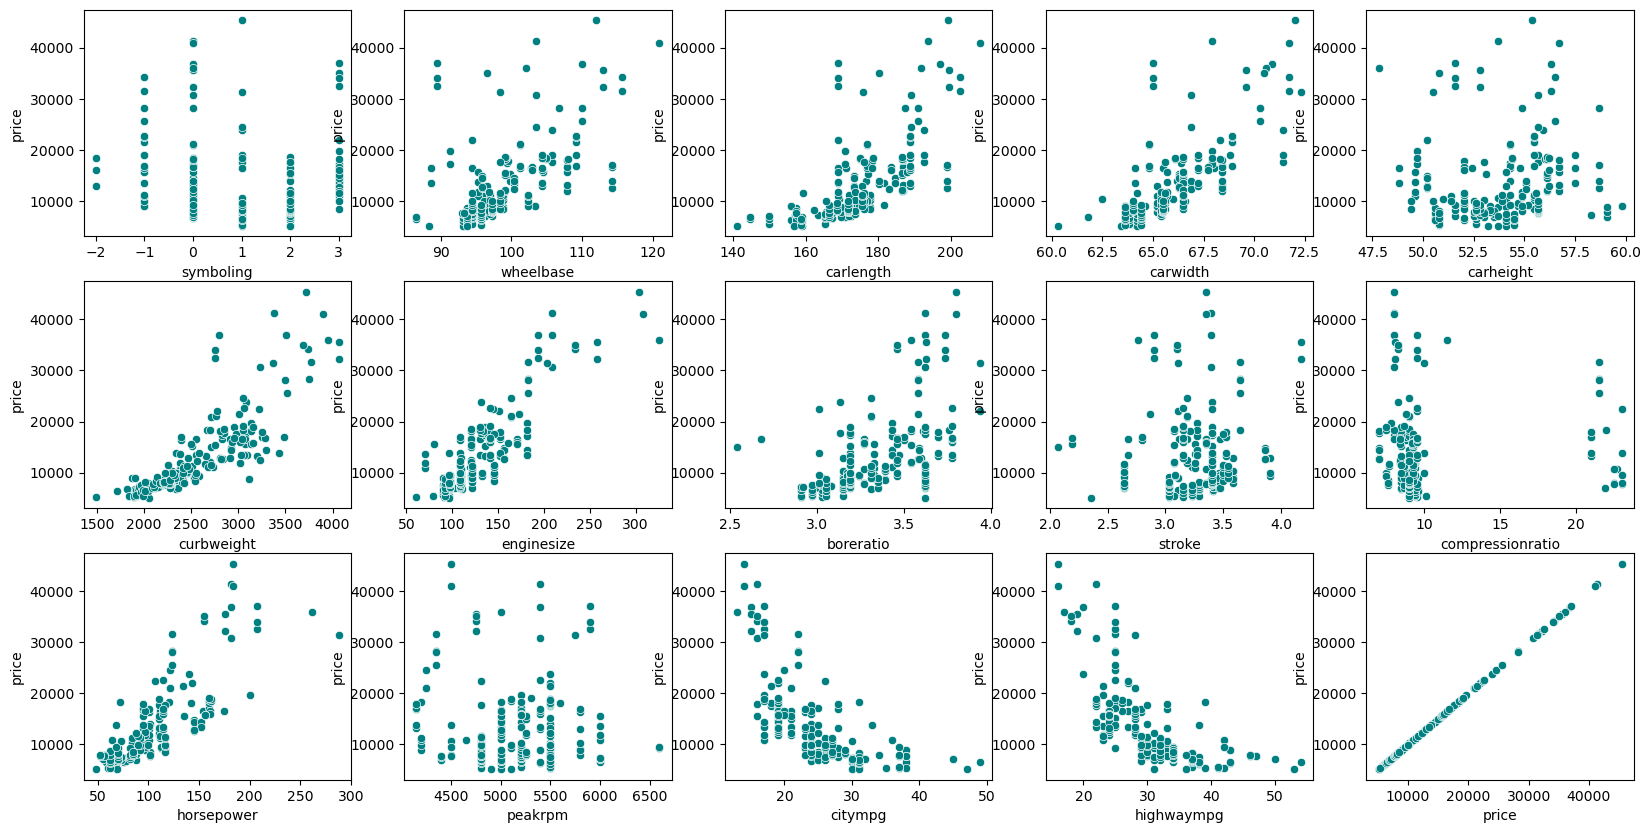

In [14]:
columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(20,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    sns.scatterplot(data[columns[i]], data['price'], color='teal')
plt.show()

* Price has positive linear relationship with carlength, carwidth, curbweight, enginesize and horsepower. When value of each of these increase, price of car will also increase.
* citympg and highwaympg have negative relationship with price. When these quantities increase, price decreases.

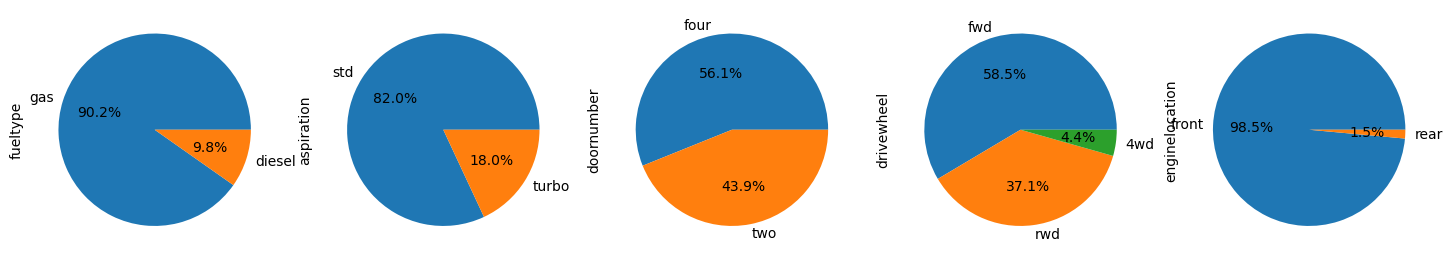

In [15]:
list = ['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation']
plt.figure(figsize=(18,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    data[list[i]].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
#plt.legend(['setosa','versicolor','virginica'], bbox_to_anchor = (1,1))
plt.show()

* Maximum cars use gas as fuel, std aspiration and fwd drivewheel.
* Maximum cars have 4 doors and front engine location.
* Very few cars have rear engine and 4wd drivewheel.

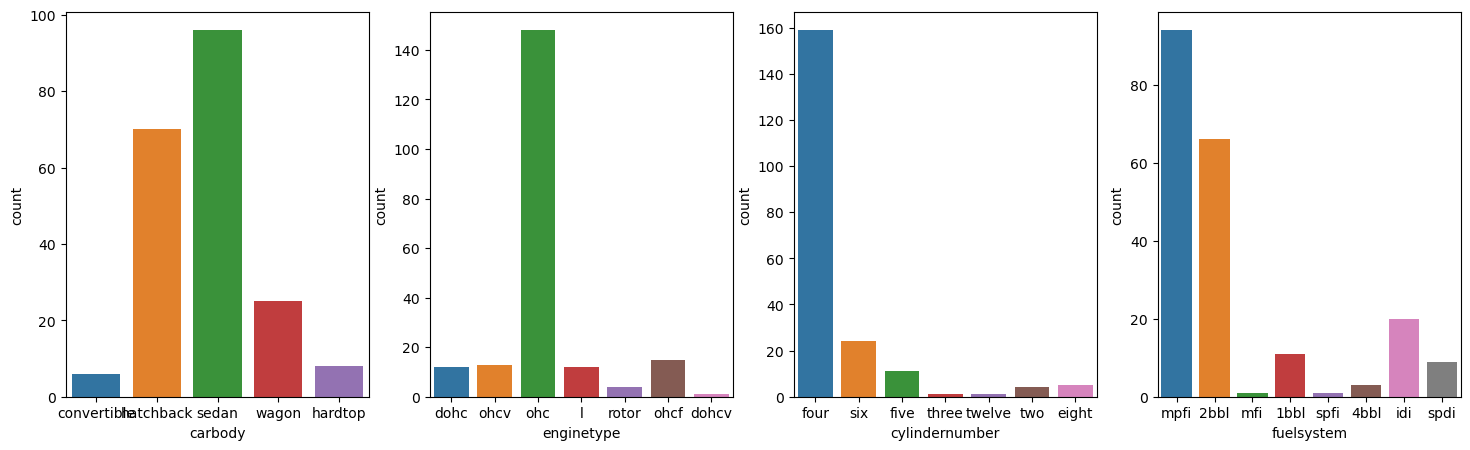

In [16]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(data['carbody'])
plt.subplot(1,4,2)
sns.countplot(data['enginetype'])
plt.subplot(1,4,3)
sns.countplot(data['cylindernumber'])
plt.subplot(1,4,4)
sns.countplot(data['fuelsystem'])
plt.show()

Most of the cars have sedan carbody, ohc enginetype, 4 cylinders and mpfi fuelsystem.

<AxesSubplot:>

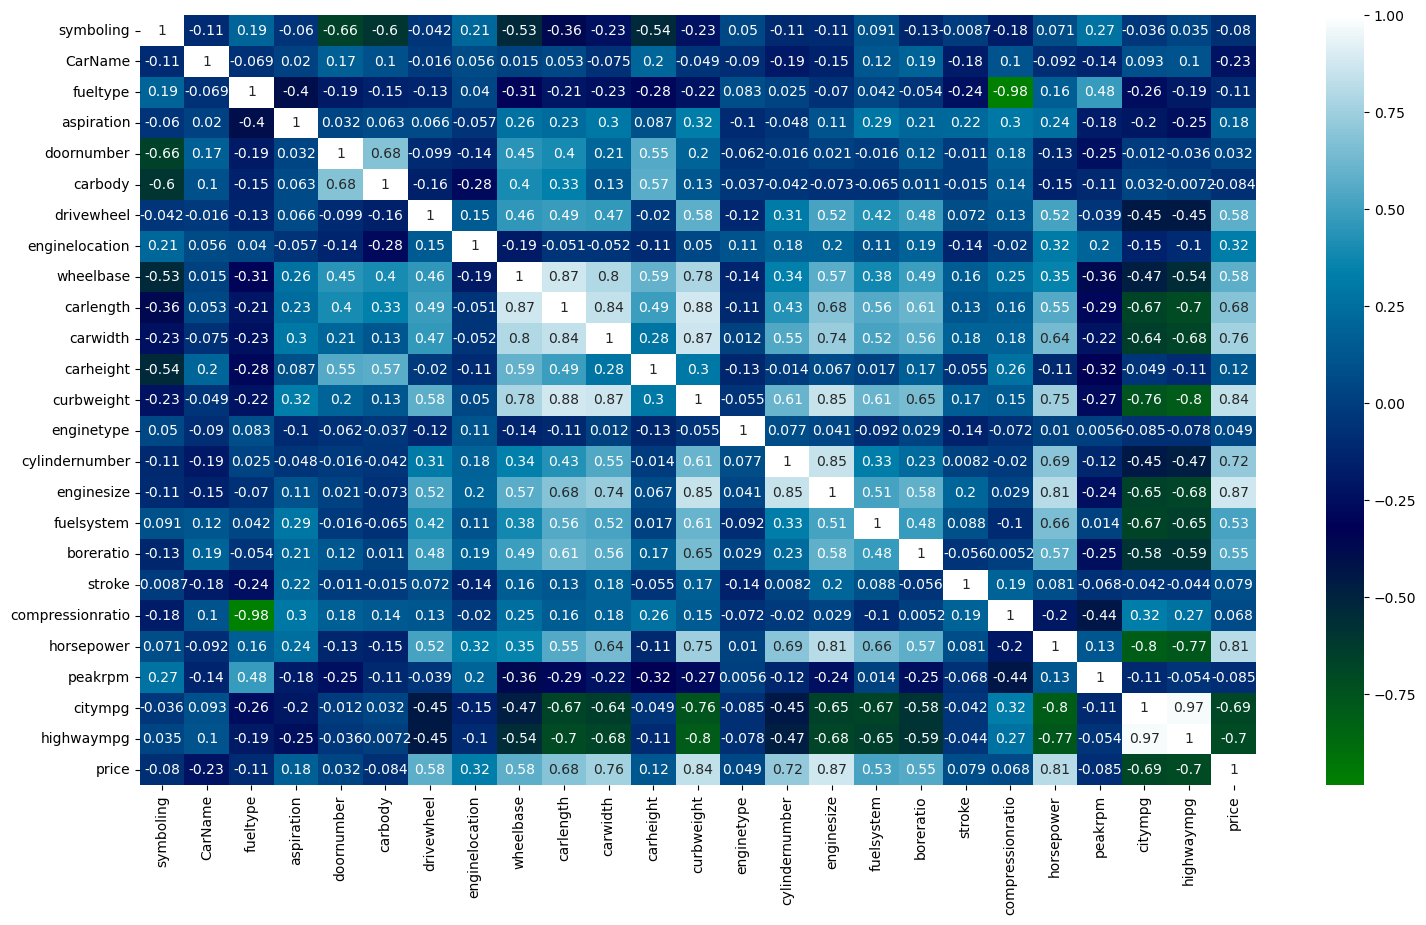

In [17]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='ocean')

Price is strongly correlated to einginesize, curbweight and horsepower.

## Model Building: Random Forest Regressor

In [18]:
# Define x & y
x = df.iloc[:,:-1]
y = df['price']

In [19]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 21)

In [20]:
# Hyperparameter tuning using GridSearchCV

# Define parameters
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
criterion = ['squared_error', 'absolute_error']
max_features = ["log2", "sqrt"]
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {"n_estimators":n_estimators,
             "criterion":criterion,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "bootstrap":bootstrap}

# Base learner
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1)

# Fit training data
rf_Grid.fit(x_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=1)

In [21]:
# Evaluate model
print('Best parameters: ', rf_Grid.best_params_)
print('Score of the model: ', rf_Grid.best_score_)

Best parameters:  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 80}
Score of the model:  0.9172496793019513


In [22]:
# Fit best parameters in the model
rf_reg_best = RandomForestRegressor(bootstrap=False,
                                    max_depth=4,
                                    max_features='log2',
                                    criterion='absolute_error',
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    n_estimators=80)
# Fit training data
rf_reg_best.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='absolute_error', max_depth=4,
                      max_features='log2', min_samples_split=5,
                      n_estimators=80)

In [23]:
# Prediction on testing data
ypred_reg = rf_reg_best.predict(x_test)

In [24]:
# Evaluate model using sklearn metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, ypred_reg)
mae = mean_absolute_error(y_test, ypred_reg)
r2 = r2_score(y_test, ypred_reg)
print('mse: ', mse)
print('mae: ', mae)
print('r2-score: ', r2)

mse:  3485738.8722917587
mae:  1390.609
r2-score:  0.9315408585380205


#### As the r2 score is close to 1, this is a very good model.